# ================================
# 1. PERKENALAN DATASET
# ================================

# Dataset yang digunakan: Telco Customer Churn (Kaggle)
# Link: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
# Studi kasus: Prediksi apakah pelanggan akan berhenti menggunakan layanan Telco berdasarkan data demografi dan layanan yang digunakan.


In [ ]:
# ================================
# 2. IMPORT LIBRARY
# ================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display option biar tabel rapi
pd.set_option('display.max_columns', 100)


In [ ]:
# ================================
# 3. MEMUAT DATASET
# ================================

# Upload file kaggle.json (klik icon file di samping, lalu "Upload")
from google.colab import files
uploaded = files.upload()   # upload kaggle.json

# Setup credential kaggle
import os
os.makedirs('/root/.kaggle', exist_ok=True)
import shutil
shutil.move('kaggle.json', '/root/.kaggle/kaggle.json')
os.chmod('/root/.kaggle/kaggle.json', 0o600)

# Install kaggle dan download dataset
!pip install -q kaggle

!kaggle datasets download -d blastchar/telco-customer-churn
!unzip -o telco-customer-churn.zip

# Load data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
print('5 data teratas:')
df.head()


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 413MB/s]
Archive:  telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  
5 data teratas:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Info data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000



Jumlah missing value per kolom:


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0



Distribusi label Churn:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


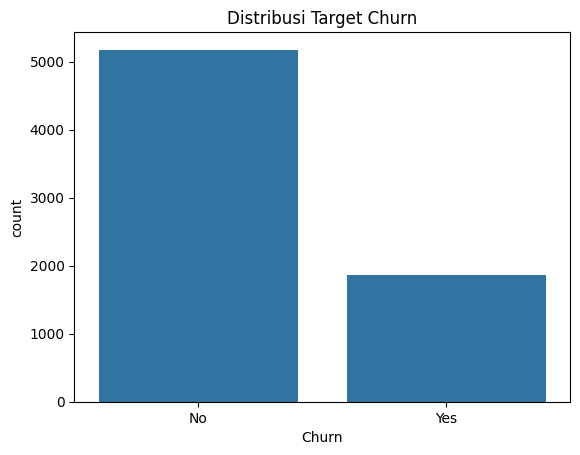

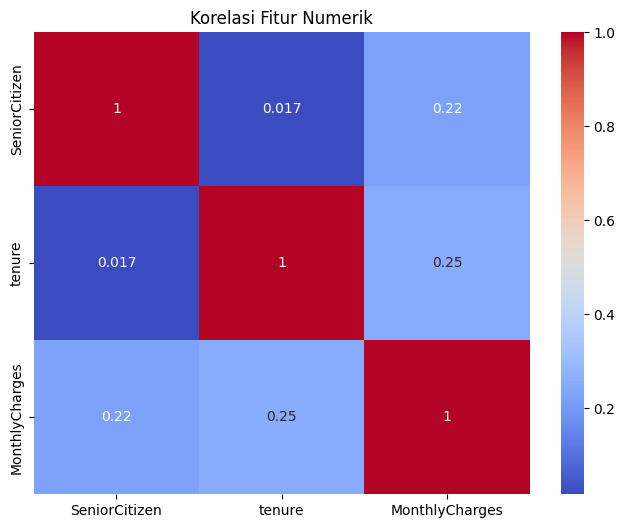

In [ ]:
# ================================
# 4. EXPLORATORY DATA ANALYSIS (EDA)
# ================================

# Info tipe data dan missing value
print("Info data:")
df.info()

print("\nStatistik deskriptif (numerik):")
display(df.describe())

print("\nJumlah missing value per kolom:")
display(df.isnull().sum())

print("\nDistribusi label Churn:")
print(df['Churn'].value_counts())
sns.countplot(x='Churn', data=df)
plt.title('Distribusi Target Churn')
plt.show()

# Contoh EDA lain: korelasi numerik
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur Numerik')
plt.show()


In [ ]:
# ================================
# 5. DATA PREPROCESSING
# ================================

df_prep = df.copy()

# Hapus kolom ID
df_prep.drop('customerID', axis=1, inplace=True)

# Convert TotalCharges ke numerik (ada yang kosong!)
df_prep['TotalCharges'] = pd.to_numeric(df_prep['TotalCharges'], errors='coerce')
df_prep['TotalCharges'].fillna(df_prep['TotalCharges'].median(), inplace=True)

# Encoding binary kategorikal
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df_prep[col] = df_prep[col].map({'Yes':1, 'No':0, 'Female':1, 'Male':0})

# One-hot encoding untuk multikategori
multi_cat = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
             'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
             'Contract', 'PaymentMethod']
df_prep = pd.get_dummies(df_prep, columns=multi_cat)

# Scaling fitur numerik
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_prep[num_cols] = scaler.fit_transform(df_prep[num_cols])

# Cek hasil preprocessing
print('Contoh hasil preprocessing:')
display(df_prep.head())


Contoh hasil preprocessing:


<ipython-input-5-74905805ab2f>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_prep['TotalCharges'].fillna(df_prep['TotalCharges'].median(), inplace=True)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,-1.277445,0,1,-1.160323,-0.994242,0,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0,0.066327,1,0,-0.259629,-0.173244,0,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True
2,0,0,0,0,-1.236724,1,1,-0.362660,-0.959674,1,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True
3,0,0,0,0,0.514251,0,0,-0.746535,-0.194766,0,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,True,False,True,False,False,False
4,1,0,0,0,-1.236724,1,1,0.197365,-0.940470,1,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False
